# VacationPy
---

## Starter Code to Import Libraries and Load the Weather and Coordinates Data

In [6]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import requests

# Import API key
from api_keys import geoapify_key

In [2]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
city_data_df = pd.read_csv("cities.csv")

# Display sample data
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


---

### Step 1: Create a map that displays a point for every city in the `city_data_df` DataFrame. The size of the point should be the humidity in each city.

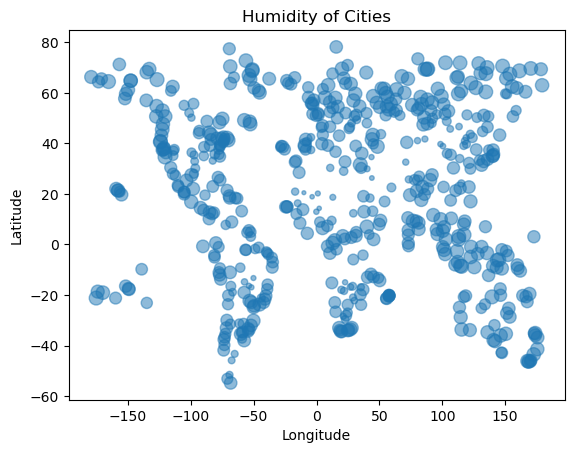

In [3]:
%%capture --no-display

# Configure the map plot
# YOUR CODE HERE

# Display the map
# YOUR CODE HERE  # Importing necessary libraries

import matplotlib.pyplot as plt

# Create a scatter plot for latitude vs. longitude with marker size representing humidity
plt.scatter(city_data_df['Lng'], city_data_df['Lat'], s=city_data_df['Humidity'], alpha=0.5)

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Humidity of Cities')

# Show plot
plt.show()




### Step 2: Narrow down the `city_data_df` DataFrame to find your ideal weather condition

In [4]:
ideal_conditions = {
    'Max Temp': 80,   # Max temperature less than or equal to 80°F
    'Humidity': 50,   # Humidity less than or equal to 50%
    'Cloudiness': 20, # Cloudiness less than or equal to 20%
    'Wind Speed': 10   # Wind speed less than or equal to 10 mph
}

# Narrow down cities that fit the ideal weather conditions
ideal_cities_df = city_data_df[(city_data_df['Max Temp'] <= ideal_conditions['Max Temp']) &
                               (city_data_df['Humidity'] <= ideal_conditions['Humidity']) &
                               (city_data_df['Cloudiness'] <= ideal_conditions['Cloudiness']) &
                               (city_data_df['Wind Speed'] <= ideal_conditions['Wind Speed'])]

# Drop any rows with null values
ideal_cities_df = ideal_cities_df.dropna()

# Display sample data
print(ideal_cities_df.sample(5))


     City_ID                City      Lat       Lng  Max Temp  Humidity  \
428      428               aktau  43.6500   51.2000     10.32        46   
560      560             changli  39.7042  119.1506      9.17        33   
258      258  comodoro rivadavia -45.8667  -67.5000     25.92        24   
101      101               heihe  50.2441  127.4902      2.32        49   
29        29         saint-louis  16.3333  -15.0000     38.80        24   

     Cloudiness  Wind Speed Country        Date  
428           0        3.91      KZ  1666108486  
560           0        2.41      CN  1666108557  
258           0        7.20      AR  1666108389  
101           3        3.14      CN  1666108295  
29            4        1.78      SN  1666108247  


### Step 3: Create a new DataFrame called `hotel_df`.

In [5]:
# Use the Pandas copy function to create a DataFrame called hotel_df to store the city, country, coordinates, and humidity
hotel_df = ideal_cities_df[['City', 'Country', 'Lat', 'Lng', 'Humidity']].copy()

# Add an empty column, "Hotel Name," to the DataFrame
hotel_df['Hotel Name'] = ""

# Display sample data
print(hotel_df.head(100))


                   City Country      Lat       Lng  Humidity Hotel Name
29          saint-louis      SN  16.3333  -15.0000        24           
44         collierville      US  35.0420  -89.6645        47           
73                nalut      LY  30.3333   10.8500        27           
90         saint george      US  37.1041 -113.5841        44           
96              zhangye      CN  38.9342  100.4517        16           
101               heihe      CN  50.2441  127.4902        49           
115          cedar city      US  37.6775 -113.0619        49           
141             brenham      US  30.1669  -96.3977        40           
158            almaznyy      RU  48.0448   40.0450        47           
174               avera      US  33.1940  -82.5271        26           
176          challapata      BO -18.9000  -66.7667        30           
186            upington      ZA -28.4478   21.2561        19           
231          carrollton      US  32.9537  -96.8903        31    

### Step 4: For each city, use the Geoapify API to find the first hotel located within 10,000 metres of your coordinates.

In [8]:
# Set parameters to search for a hotel
radius = 1000
params = {
    "radius": radius,  # Search radius
    "categories": "accommodation",  # Category of places to search for
    "apiKey": geoapify_key, 
}

# Print a message to follow up the hotel search
print("Starting hotel search")

# Iterate through the hotel_df DataFrame
for index, row in hotel_df.iterrows():
    # get latitude, longitude from the DataFrame
    lat = row["Lat"]
    lng = row["Lng"]
    
    # flter and bias parameters with the current city's latitude and longitude
    params["filter"] = f"circle:{lng},{lat},{radius}"
    params["bias"] = f"proximity:{lng},{lat}"
    
    # Set base URL
    base_url = "https://api.geoapify.com/v2/places"

    # Make an API request using the params dictionary
    response = requests.get(base_url, params=params)
    
    # convert the API response to JSON format
    name_address_json = response.json()
    
    # Grab the first hotel from the results and store the name in the hotel_df DataFrame
    try:
        hotel_df.loc[index, "Hotel Name"] = name_address_json["features"][0]["properties"]["name"]
    except (KeyError, IndexError):
        # If no hotel is found, set the hotel name as "No hotel found".
        hotel_df.loc[index, "Hotel Name"] = "No hotel found"
        
    # Log the search results
    print(f"{hotel_df.loc[index, 'City']} - nearest hotel: {hotel_df.loc[index, 'Hotel Name']}")

# Display sample data
print(hotel_df.head())

Starting hotel search
saint-louis - nearest hotel: No hotel found
collierville - nearest hotel: No hotel found
nalut - nearest hotel: No hotel found
saint george - nearest hotel: The Advenire, an Autograph Collection Hotel
zhangye - nearest hotel: Zhangye Hotel 张掖饭店
heihe - nearest hotel: Санкт-Петербург
cedar city - nearest hotel: Baymont Inn & Suites
brenham - nearest hotel: Ant Street Inn
almaznyy - nearest hotel: No hotel found
avera - nearest hotel: No hotel found
challapata - nearest hotel: Residencial Marian
upington - nearest hotel: Aardwolf Backpackers
carrollton - nearest hotel: No hotel found
russkaya polyana - nearest hotel: No hotel found
comodoro rivadavia - nearest hotel: No hotel found
chengde - nearest hotel: 紫御国际假日酒店
kingman - nearest hotel: Arizona Inn
swan river - nearest hotel: No hotel found
ribeira grande - nearest hotel: Quinta da Maria
aktau - nearest hotel: No hotel found
lakki marwat - nearest hotel: Sana Home
yangliuqing - nearest hotel: No hotel found
tieli

### Step 5: Add the hotel name and the country as additional information in the hover message for each city in the map.

In [21]:
pn.extension('bokeh')  

# hotel_df has columns 'Lat', 'Lng', 'City', 'Country', 'Hotel Name'
hover_cols = ['City', 'Country', 'Hotel Name']

# map plot
map_plot = hotel_df.hvplot.points('Lng', 'Lat', geo=True, tiles='OSM',
                                  hover_cols=hover_cols,
                                  title='Hotel Locations',
                                  color='blue', size=100,
                                  width=400, height=600)  # Adjusted the width for layout

# table of hotel names
hotel_table = hotel_df[['City', 'Country', 'Hotel Name']].hvplot.table(width=400, height=600)

# layout with the map and the table side by side
layout = pn.Row(map_plot, hotel_table)

layout


Row
    [0] HoloViews(Overlay, height=600, sizing_mode='fixed', width=400)
    [1] HoloViews(Table, height=600, width=400)